# Introduction to scikit-learn
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license
* Documentation: [http://scikit-learn.org/stable/documentation.html](http://scikit-learn.org/stable/documentation.html)

## installation
`$ pip install scikit-learn`

## Loading an example dataset

Scikit-learn comes with a few standard datasets, for instance the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) datasets for classification.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


![Sepal vs. Petal](images/sepal-petal.jpg)

In [3]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Data preparation
In order to be able to measure the performance of an estimator, we need to split the data into train and test data sets. Shuffling is necessary.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 135
Test size: 15


## Learning and predicting
In the case of the Iris dataset, the task is to predict, given a feature vector, which species the flower belong to. We are given samples of each of the 3 possible classes on which we fit an estimator to be able to predict the species to which unseen samples belong.

An example of an estimator is the class [sklearn.naive_bayes.GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) that implements Gaussian Naive Bayes classification.

In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print(iris.target_names[clf.predict(X_test)])

['virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'setosa']


In [7]:
print(clf.predict_proba(X_test))

[[7.32638269e-134 5.85583134e-002 9.41441687e-001]
 [4.96457957e-091 9.83212461e-001 1.67875394e-002]
 [1.56233677e-212 1.47312843e-008 9.99999985e-001]
 [1.00000000e+000 1.07998590e-015 2.68959296e-024]
 [7.66899678e-147 2.00030933e-002 9.79996907e-001]
 [6.99276518e-213 5.48147476e-009 9.99999995e-001]
 [8.60766329e-244 2.34385985e-009 9.99999998e-001]
 [2.87930836e-277 1.57772990e-011 1.00000000e+000]
 [1.39709119e-068 9.99974101e-001 2.58985552e-005]
 [1.00000000e+000 1.30748487e-017 2.79785467e-026]
 [3.94739085e-072 9.99806416e-001 1.93584375e-004]
 [6.85580550e-126 1.61401370e-001 8.38598630e-001]
 [1.00000000e+000 3.59906679e-015 2.56410224e-023]
 [2.97219745e-065 9.99958648e-001 4.13516941e-005]
 [1.00000000e+000 2.29160610e-017 2.74765239e-026]]


## Model persistence
It is possible to save a model in the scikit by using Python’s built-in persistence model, namely [pickle](https://docs.python.org/2/library/pickle.html):

In [8]:
import pickle

with open('/tmp/model.pkl', 'wb') as f:
    pickle.dump(clf, f)
    
with open('/tmp/model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
    print(iris.target_names[clf2.predict(X_test)])

['virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'setosa']


## Model evaluation
Scikit-learn provides implementation of all methods you need.

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print ("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ()
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

Test accuracy: 0.93

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         4
 versicolor       1.00      0.80      0.89         5
  virginica       0.86      1.00      0.92         6

avg / total       0.94      0.93      0.93        15



In [10]:
y_pred = clf.predict(X_train)

print ("Train accuracy: {:.2f}".format(accuracy_score(y_train, y_pred)))
print ()
print(metrics.classification_report(y_train, y_pred, target_names=iris.target_names))

Train accuracy: 0.96

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        46
 versicolor       0.93      0.96      0.95        45
  virginica       0.95      0.93      0.94        44

avg / total       0.96      0.96      0.96       135



In [11]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[4 0 0]
 [0 4 1]
 [0 0 6]]


In [12]:
from sklearn.model_selection import cross_val_score

folds = 10
acccuracies = cross_val_score(clf, iris.data, iris.target, cv=folds, scoring='accuracy')
print('Cross-validated accuracy: {:.2f} with standard deviation {:.2f}'.format(acccuracies.mean(), acccuracies.std()))

Cross-validated accuracy: 0.95 with standard deviation 0.04


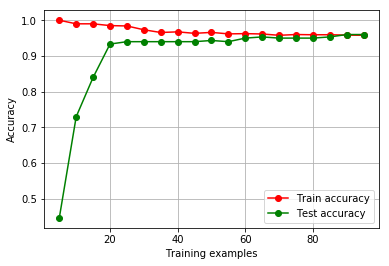

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    clf,
    iris.data, iris.target,
    train_sizes=range(5,99,5),
    n_jobs=-1,
    cv=cv,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#train_scores_std = np.std(train_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)
#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                     train_scores_mean + train_scores_std, alpha=0.1,
#                     color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test accuracy")

plt.xlabel("Training examples")

plt.ylabel("Accuracy")

plt.grid()

plt.legend(loc="best")

plt.show()